# <img src="https://img.icons8.com/bubbles/100/000000/3d-glasses.png" style="height:50px;display:inline"> EE 046746 - Technion - Computer Vision


## Homework 2 - Segmentation
---

### <a style='color:red'> Due Date: 17/5/2022  </a>

### <img src="https://img.icons8.com/bubbles/50/000000/upload-to-cloud.png" style="height:50px;display:inline"> Submission Guidelines
---
#### READ THIS CAREFULLY
* Submission only in **pairs**.
* **No handwritten submissions**.
* You can choose your working environment:
    * You can work in a `Jupyter Notebook`, locally with <a href="https://www.anaconda.com/distribution/">Anaconda</a> or online on <a href="https://colab.research.google.com/">Google Colab</a>
  * **Important**: Colab also supports running code on GPU, so if you don't have one, Colab is the way to go. To enable GPU on Colab, in the menu: `Runtime` $\rightarrow$  `Change Runtime Type` $\rightarrow$`GPU`.
    * You can work in a Python IDE such as <a href="https://www.jetbrains.com/pycharm/">PyCharm</a> or <a href="https://code.visualstudio.com/">Visual Studio Code</a>.
        * Both also allow opening/editing Jupyter Notebooks.

* Make sure you submit your exercise according to the requirements in the <a href="https://moodle.technion.ac.il/pluginfile.php/1823033/mod_resource/content/2/Homework%20guidelines.pdf">"Homework submission guidelines"</a> file that appears in the course website (Moodle). 
* **The code should run both on CPU and GPU without manual modifications**, require no special preparation and run on every computer.
* Be precise, we expect on point answers.
* Submission on the course website (Moodle).

### <img src="https://img.icons8.com/cute-clipart/64/000000/youtube.png" style="height:50px;display:inline"> Video Submission (YouTube - Optional)
---
* In this exercise you are going to produce a video.
* In addition to submiting this video in the `\output` folder (**MANDATORY**), we are also giving you the option to upload it to YouTube and submit the link in a different section on the website (just below the original submission section).
    * This will benefit you when you explain your expertise in Computer Vision (e.g., in a job interview).
    * We also may make something nice with your works at the end of the course.
* If you don't want to make your video public, you can change its visibility to "Unlisted", and then it can only be accessed via link:

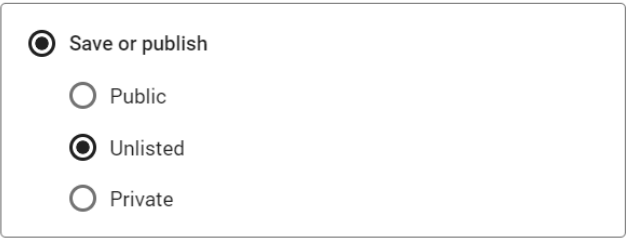

* Finally, submit the link on the course website and answer if you are okay with making this video public:

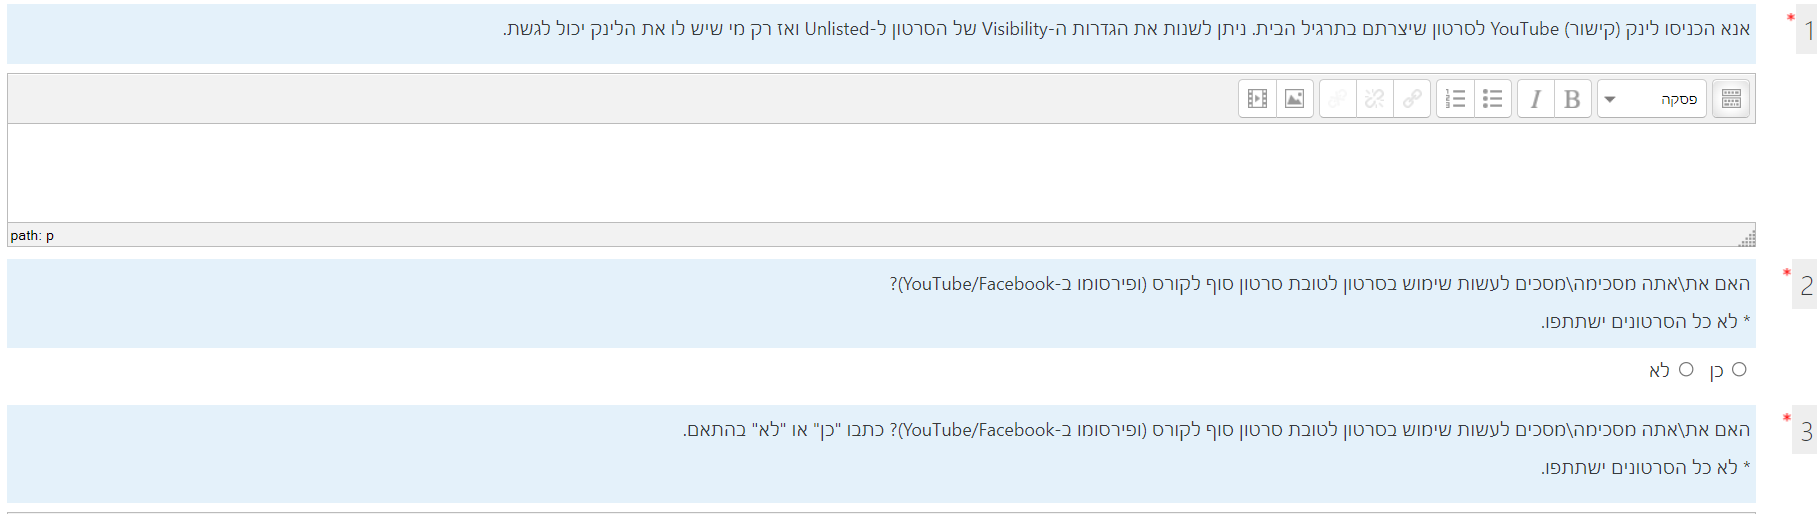


### <img src="https://img.icons8.com/dusk/64/000000/python.png" style="height:50px;display:inline"> Python Libraries
---

* `numpy`
* `matplotlib`
* `pytorch` (and `torchvision`)
* `opencv` (or `scikit-image`)
* `scikit-learn`
* Anything else you need (`PIL`, `os`, `pandas`, `csv`, `json`,...)

### <img src="https://img.icons8.com/bubbles/50/000000/checklist.png" style="height:50px;display:inline"> Tasks
---
* In all tasks, you should document your process and results in a report file (which will be saved as `.pdf`). 
* You can reference your code in the report file, but no need for actual code in this file, the code is submitted in a seprate folder as explained above.

#### Part 1 - Classic Vs. Deep Learning-based Semantic Segmentation
---
In this part you are going to compare classic methods for segmentation to deep learning-based methods. 

1. Load the images in the `./data/frogs` and `./data/horses` folders and display them.
2. Pick 1 classic method for segmentation and 1 deep learning-based method and segment the given images. Display the results.
    * **Briefly** summarize each method you picked and discuss the advantages and disadvantages of each method. In your answer, relate to the results you received in this section.
    * You can use a ready implementation from the internet or OpenCV, no need to implement it yourselves.
    * Note: the classic method **must not** use any neural network.
3. Pick 3 images (download from the internet or take them yourself) that satisfy the following, and dispaly them:
    * One image of a living being (human, animal,...).
    * One image of commonly-used object (car, chair, smartphone, glasses,...).
    * One image of not-so-commonly-used object (fire extinguisher, satellite,... **BE CREATIVE**).
4. Apply each method (one classic and one deep learning-based) on the 3 images. Display the results (mask and segmented image).
    * Which method performed better on each image? Describe your thoughts on why one method is better than the other.
    * For the classic method you can change parameters per-image, document them in the report.
    * You can add manual post-processing to get a mask if needed. If you do that, document in your report "how hard" you had to work in the post-processing stage, as it's an indication of the quality of the method.
5. As you probably have noticed, segmentation can be rough around the edges, i.e., the mask is not perfect and may be noisy around the edges. What can be done to fix or at least alleviate this problem? Your suggestions can be in pre-processing, inside the segmentation algorithm or in post-processing.

#### Part 2 - Adversarial Images
---
Adversarial examples are specialised images created with the purpose of confusing a neural network, resulting in the misclassification of a given input. In this excersie you are going to create an adversarial images first by using augmentations and then by using segmentation.

1. Load a pre-trained classifier (which was trained on ImageNet) from: https://pytorch.org/vision/stable/models.html#classification
. In HW1 you used VGG16, but you can choose a different classifier
for this assignment.
2. Pick an image of an animal in its natural habitat (e.g., cow on grass fields, zebra in the safari etc. You can also use the supplied ./data/cow.jpg or ./data/sheep.jpg ).
Display the image you chose and feedforward it to the pre-trained network. What is the network's prediction? To convert from class index to label, use the supplied
./data/imagenet1000_clsidx_to_labels.txt file.
3. Apply the following 3 transformations to create 3 *new* images from the image from section 2, and display them (`openCV` has functions for all):
    * One **geometric transformation** (rotation, scaling, translation, warping...).
    * One **color transformation** (thresholding, different color space, hue, saturation, brightness, contrast...).
    * One **filter** (any filter you want).
4. Feed the transformed images to network, what is the output? is it different than section 2? Discuss the reasons for that to happen.
5. Segment the animal from the image in section 2, using classic or deep segmentation method. Display the result.
6. Put the the animal in a different habitat, i.e., use the segmentation mask to place the animal on a different background. You can choose any background you want (which is not the animal's natural habitat). For example, put the bird on the moon or the cow on a beach (You can use the supplied ./data/background images). Dispaly the result.
  * You should submit the final image in the `./output` folder.
  * It's encouraged to make the homework checker laugh.
7. Feed the new image to the classifier, what is the output? is it different than section 2? Discuss the reasons for that to happen.

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
#section 1

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
# pytorch
import torch
import torch.nn as nn
import torchvision
# import datasets in torchvision
import torchvision.datasets as datasets
# import model zoo in torchvision
import torchvision.models as models
import torchvision.transforms as transforms
from torchvision import utils

# default of vgg16 model is pretrained on imagenet data
# load pretrained model
model = models.vgg16(pretrained=True, progress=True)
# put in evaluation mode
model.eval();

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

predicted class: 'ram, tup',


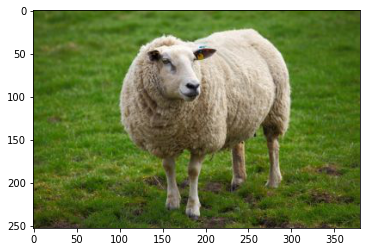

In [3]:
# section 2

# display the image
sheep = plt.imread('/content/gdrive/MyDrive/data/sheep.jpg')

plt.imshow(sheep)

#making the normalization process as simile as shown in tutorial 03_appendix
#before feeding it to our network

def normalize(image):
  normalize = transforms.Normalize(
  mean=[0.485, 0.456, 0.406],
  std=[0.229, 0.224, 0.225]
  )
  preprocess = transforms.Compose([
  transforms.ToPILImage(),
  transforms.Resize((224,224)),
  transforms.ToTensor(),
  normalize
  ])
  image = preprocess(image).unsqueeze(0)
  return image

# helper function in order to extract model prediction
def predict(image, model, labels=None):
  _, index = model(image).data[0].max(0)
  if labels is not None:
    return str(index.item()), labels[str(index.item())][1]
  else:
    return str(index.item())

# convert class index to label
with open('/content/gdrive/MyDrive/data/imagenet1000_clsidx_to_labels.txt') as f: 
    d = dict([line.strip().split(': ', 1) for line in f])

# normalize our image 
prep_sheep = normalize(sheep)    

# feeding the image to the network and print output
print("predicted class:", d.get(predict(prep_sheep, model)))

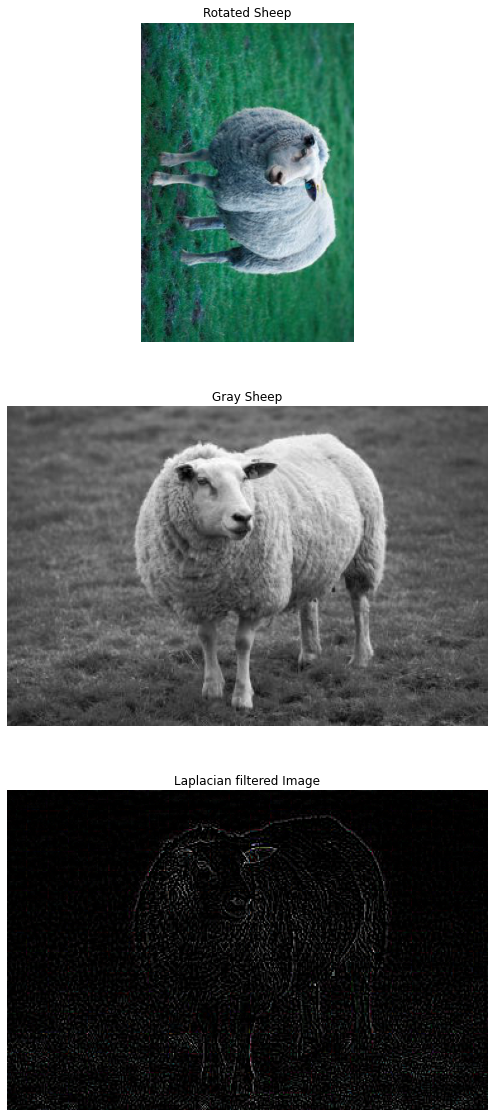

In [4]:
# section 3
import cv2

#make the transformations
sheep_rotated = cv2.rotate(sheep, cv2.ROTATE_90_CLOCKWISE)
sheep_gray = cv2.cvtColor(sheep, cv2.COLOR_RGB2GRAY)
laplace_sheep = cv2.Laplacian(sheep,cv2.CV_8UC3)

# show the transformations
fig = plt.figure(figsize=(26, 20)) # create a figure, just like in matlab
ax = fig.add_subplot(3, 1, 1) # create a subplot of certain size
ax.imshow(cv2.cvtColor(sheep_rotated, cv2.COLOR_BGR2RGB))
ax.set_title("Rotated Sheep")
ax.set_axis_off()

ax = fig.add_subplot(3, 1, 2) # create a subplot of certain size
sheep_gray = cv2.cvtColor(sheep_gray, cv2.COLOR_BGR2RGB)
ax.imshow(sheep_gray)
ax.set_title("Gray Sheep")
ax.set_axis_off()

ax = fig.add_subplot(3, 1, 3) # create a subplot of certain size
ax.imshow(cv2.cvtColor(laplace_sheep, cv2.COLOR_BGR2RGB))
ax.set_title("Laplacian filtered Image")
ax.set_axis_off()




In [5]:
# section 4

#preprocess the transformed images
prep_rotated_sheep = normalize(sheep_rotated)
prep_gray_sheep = normalize(sheep_gray)
prep_laplace_sheep = normalize(laplace_sheep)

#feed to the network and show the results
print("predicted class for rotation:", d.get(predict(prep_rotated_sheep, model)))
print("predicted class for gray-scaling:", d.get(predict(prep_gray_sheep, model)))
print("predicted class for laplacian filtered image:", d.get(predict(prep_laplace_sheep, model)))


predicted class for rotation: 'ram, tup',
predicted class for gray-scaling: 'ram, tup',
predicted class for laplacian filtered image: 'jellyfish',


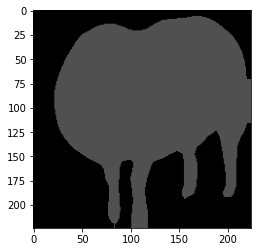

In [8]:
# section 5

#we have a pretrained model of FCN with a Resnet50 backbone
fcn = models.segmentation.fcn_resnet50(pretrained=True).eval()

#load our image as PIL
img = Image.open('/content/gdrive/MyDrive/data/sheep.jpg')

# Apply the transformations needed
seg_normalize = transforms.Compose([transforms.Resize(256),
                 transforms.CenterCrop(224),
                 transforms.ToTensor(), 
                 transforms.Normalize(mean = [0.485, 0.456, 0.406], 
                             std = [0.229, 0.224, 0.225])])
inp = seg_normalize(img).unsqueeze(0)

# Pass the input through the net
out = fcn(inp)['out']

"""The output of the model is [No x Co x Ho x Wo]
where,

No -> is the batch size (same as Ni)
Co -> is the number of classes that the dataset have!
Ho -> the height of the image (which is the same as Hi in almost all cases)
Wo -> the width of the image (which is the same as Wi in almost all cases)"""

"""
Now, what we need to do is make this 21 channeled output into a 2D image or a 1 channeled image,
 where each pixel of that image corresponds to a class!

So, the 2D image, (of shape [H x W]) will have each pixel corresponding to a class label, and thus
for each (x, y) in this 2D image will correspond to a number between 0 - 20 representing a class.

And how do we get there from this [1 x 21 x H x W]?
We take a max index for each pixel position, which represents the class
"""

max_class = torch.argmax(out.squeeze(), dim=0).detach().cpu().numpy()

"""
The last thing is to take this 2D image where each pixel corresponds to a class label and convert this
into a segmentation map where each class label is converted into a RGB color
"""

def decode_segmap(image, NumOfClasses=21):
  #stores the colors for each of the clases, according to the index
  label_colors = np.array([(0, 0, 0),  # 0=background
               # 1=aeroplane, 2=bicycle, 3=bird, 4=boat, 5=bottle
               (128, 0, 0), (0, 128, 0), (128, 128, 0), (0, 0, 128), (128, 0, 128),
               # 6=bus, 7=car, 8=cat, 9=chair, 10=cow
               (0, 128, 128), (128, 128, 128), (64, 0, 0), (192, 0, 0), (64, 128, 0),
               # 11=dining table, 12=dog, 13=horse, 14=motorbike, 15=person
               (192, 128, 0), (64, 0, 128), (192, 0, 128), (64, 128, 128), (192, 128, 128),
               # 16=potted plant, 17=sheep, 18=sofa, 19=train, 20=tv/monitor
               (0, 64, 0), (80, 80, 80), (0, 192, 0), (128, 192, 0), (0, 64, 128)])

  r = np.zeros_like(image).astype(np.uint8)
  g = np.zeros_like(image).astype(np.uint8)
  b = np.zeros_like(image).astype(np.uint8)
  #Now, we loop over each class color we stored in label_colors.
  # And we get the indexes in the image where that particular class label is present. (idx = image == l)
  # And then for each channel, we put its corresponding color to those pixels where that class label is present
  for label in range(0, NumOfClasses):
    idx = image == label
    r[idx] = label_colors[label, 0]
    g[idx] = label_colors[label, 1]
    b[idx] = label_colors[label, 2]
    
  rgb = np.stack([r, g, b], axis=2)
  return rgb

#let's use this function to see the final segmented output
segmented_pic = decode_segmap(max_class)

plt.imshow(segmented_pic)


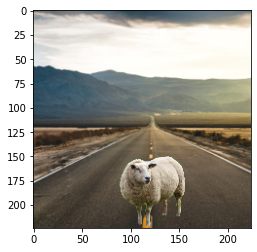

In [9]:
# section6

#from previous section
sheep_hue = (80, 80, 80)
background = (0,0,0)

new_background = Image.open('/content/gdrive/MyDrive/data/my_data/road.jpg')
img = Image.open('/content/gdrive/MyDrive/data/sheep.jpg')

#preprocess sheep and background
resize = transforms.Resize(256)
center = transforms.CenterCrop(224)
centered_new_background = np.array(center(resize(new_background)))
centered_sheep = np.array(center(resize(img)))


#the output image
new_image = np.zeros((224,224,3),dtype=np.uint8)

new_image[background == segmented_pic] = centered_new_background[background == segmented_pic]
new_image[sheep_hue == segmented_pic] = centered_sheep[sheep_hue == segmented_pic]

# scaling the sheep
scaled_img = new_image
scaled_img[background == segmented_pic] = 0
# Get extent of interesting part, i.e. non-white part
y, x, _ = np.nonzero(scaled_img)
y0, y1 = np.min(y), np.max(y)    # top and bottom rows
x0, x1 = np.min(x), np.max(x)    # left and right cols
h, w = y1-y0, x1-x0              # height and width
ROI = scaled_img[y0:y1, x0:x1]         # extract ROI


# Downscale ROI
factor = 3
scaledROI = cv2.resize(ROI, (w//factor,h//factor), interpolation=cv2.INTER_NEAREST)
newH, newW = scaledROI.shape[:2]

# Clear original image to white
scaled_img[:] = background

# Get centre of original shape, and position of top-left of ROI in output image
cx, cy = (x0 + x1) //2, (y0 + y1)//2
top  = cy + newH//2 
left = cx - newW//2 

# Paste in rescaled ROI
scaled_img[top:top+newH, left:left+newW] = scaledROI
scaled_img[scaled_img == background] = centered_new_background[scaled_img == background]

plt.imshow((scaled_img))


In [ ]:
# section 7

# normalize our image 
prep_scaled_img = normalize(scaled_img)    

# feeding the image to the network and print output
print("predicted class:", d.get(predict(prep_scaled_img, model)))

predicted class: 'hay',


#### Part 3 - Jurrasic Fishbach
---
In this part you are going to apply segmentation on a video, and integrate with other elements.

<img src="https://lh3.googleusercontent.com/5zF16wl-tdE1FZCuVsrNxHWzfa6uXo4hYE_BGabKnGovw2W-bIT9gnZlAgU8nUoK=w412-h220-rw">

1. Film a short video of yourself (you can use your phone for that), but without too much camera movement. You on the other hand, can move however you want (we expect you to). Convert the video to frames and resize the images for a reasonable not too high resolution (lower than 720p ~ 1280x720 pixles). You can use the function in `./code/frame_video_convert.py` to help you. Display 2 frames in the report.
2. Segment yourself out of the video (frame-by-frame) using one of the methods (classic or deep). Display 2 frames in the report.
3. Pick one of the objects in the supplied videos file (`./data/video_models`), convert it to images and segement it out by using classic or deep method. Display 2 frames in the report. You can choose another object from: https://pixabay.com/videos/search/green%20screen/.
    * Explain how you performed the segmentation for this specific type of video (i.e., green-screen videos). Did you  use a simple/classic method? Deep method? Combined both?
4. Put it all together - pick a background, put yourself and the segemented object on the background. Stich it frame-by-frame (don't make the video too long or it will take a lot of time, 10secs maximum). Display 2 frames of the result in your report. Convert the frames back to video. You can use the function in `frame_video_convert.py` to help you.
    * Tip: To make it look good, you can resize the images, create a mapping from pixel locations in the original image to pixels locations in the new image.
    * You should submit the final video in the `./output` folder (**MANDATORY**), and upload it to YouTube (**OPTIONAL**) as instructed above.
    * We expect some creative results, this can benefit you a lot when you want to demonstrate your Computer Vision abilities.

#### Part 4 - Dry Questions
---

1. Explain the difference between segmentation and semantic-segmentation. State an algorithm that performs standard segmentation and an algorithm that performs semantic segmentation.
2. Steve designed a segmentation algorithm, where the origin of the algorithm is always triangles. When he tried to segment a circle, he got the results below. Calculate the Intersection Over Union (IoU) in each case (it is enough to find an expression with the given parameters). 'o' indicates the center of the circle. The prediction of the algorithm is marked with a dashed line.

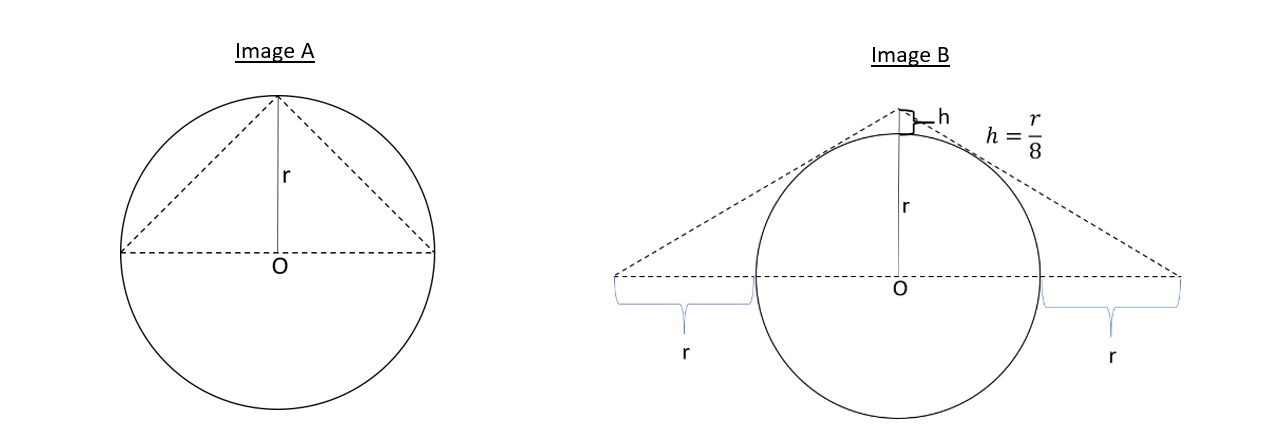



---
## <img src="https://img.icons8.com/dusk/64/000000/prize.png" style="height:50px;display:inline"> Credits
* Images from <a href="http://www.image-net.org/">Imagenet</a>
* Videos from <a href="https://pixabay.com/videos/search/green%20screen/">Pixabay</a>
    * Dinosaur video from <a href="https://sites.google.com/a/sau17.net/modern-media/home/green-screen-animations">Modern Media</a>
* Icons from <a href="https://icons8.com/">Icon8.com</a> - https://icons8.com